# Dataset Processing

Import the pandas library for CVS read and processing\
Dataset name: NSLKDD \
Original URL for dataset: https://www.kaggle.com/hassan06/nslkdd\ \
Dataset in dropbox: https://www.dropbox.com/sh/u2iehqdvwj13ggb/AABVFP-62CpK7plwXdlgdq63a?dl=0

In [1]:
!pip install pandas
import pandas as pd


In [2]:
# Read the CSV files and create Data frames using the read_csv function of the Pandas library
# create data frame from the training data
train_df=pd.read_csv("KDDTrain.csv")

# create data frame from the testing data
test_df=pd.read_csv("KDDTest.csv")



In [3]:
# show overall structure of the training data frame using the head function
(train_df.head(5))


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
#show the size of the training dataset
train_df.shape


(125973, 42)

In [5]:
#show the size of the testing dataset
test_df.shape

(22544, 42)

In [6]:
# show number of entries (rows) in the training data frame
print("Number of entry="+str(len(train_df)))


Number of entry=125973


In [7]:
# show number of attributes (columns) in the training data frame
print("Number of columns="+str(len(train_df.columns)))


Number of columns=42


In [8]:
# iterating and printing the column headings
print('Name of the headings')
i=1
for col in train_df.columns: 
    print('\t'+str(i)+'. '+col) 
    i+=1
    

Name of the columns
	1. duration
	2. protocol_type
	3. service
	4. flag
	5. src_bytes
	6. dst_bytes
	7. land
	8. wrong_fragment
	9. urgent
	10. hot
	11. num_failed_logins
	12. logged_in
	13. num_compromised
	14. root_shell
	15. su_attempted
	16. num_root
	17. num_file_creations
	18. num_shells
	19. num_access_files
	20. num_outbound_cmds
	21. is_host_login
	22. is_guest_login
	23. count
	24. srv_count
	25. serror_rate
	26. srv_serror_rate
	27. rerror_rate
	28. srv_rerror_rate
	29. same_srv_rate
	30. diff_srv_rate
	31. srv_diff_host_rate
	32. dst_host_count
	33. dst_host_srv_count
	34. dst_host_same_srv_rate
	35. dst_host_diff_srv_rate
	36. dst_host_same_src_port_rate
	37. dst_host_srv_diff_host_rate
	38. dst_host_serror_rate
	39. dst_host_srv_serror_rate
	40. dst_host_rerror_rate
	41. dst_host_srv_rerror_rate
	42. class


In [9]:
# frequency count of the classification column 'class' 
count = train_df['class'].value_counts() 
print(count) 


normal     67343
anomaly    58630
Name: class, dtype: int64


<AxesSubplot:>

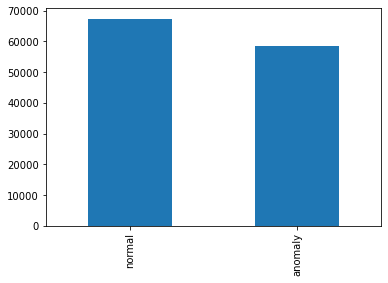

In [10]:
# Plot a bar chart of the frequency distribution of the class column
train_df['class'].value_counts().plot.bar()


# Scaling & Normalization

In [11]:
# show datatypes of each attribute in the dataset
train_df.dtypes


duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [12]:
# show statistical details for all the numerical attributes in the training dataset
train_df.describe()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# show statistical details for all the numerical attributes in the testing dataset 
test_df.describe()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
#Data normalization is required for the numerical attributes as the mean values are not between zero and one
# normalisation will result in these values being scaled 0-1


# import the library for the scalling
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()

# get the column names
col = train_df.select_dtypes(include=['float64','int64']).columns

# extract the numerical fields from the dataset
train_sc=scl.fit_transform(train_df.select_dtypes(include=['int64','float64']))
test_sc=scl.fit_transform(test_df.select_dtypes(include=['int64','float64']))

# store the result in another data frame
sc_traindf = pd.DataFrame(train_sc, columns = col)
sc_testdf = pd.DataFrame(test_sc, columns = col)


In [15]:
# Testing the scaling
sc_traindf.shape


(125973, 38)

In [16]:
# display outcome of the normalisation process. The mean is almost now one and SD is 1
sc_traindf.describe()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,...,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05
mean,2.549477e-17,-4.512349e-19,7.614590e-19,-4.794371e-18,4.230328e-19,4.455945e-18,-2.244894e-17,2.989431e-18,1.558171e-17,-6.549957e-18,...,-1.756996e-17,-5.815290e-17,-1.215514e-16,-2.374624e-17,2.899184e-17,3.068398e-17,1.711873e-17,-2.631264e-17,4.907180e-17,7.749960e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.102492e-01,-7.762241e-03,-4.918644e-03,-1.408881e-02,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,-8.092618e-01,-1.166364e-02,...,-1.836071e+00,-1.044721e+00,-1.161030e+00,-4.390782e-01,-4.801968e-01,-2.891034e-01,-6.395319e-01,-6.248708e-01,-3.876346e-01,-3.763870e-01
25%,-1.102492e-01,-7.762241e-03,-4.918644e-03,-1.408881e-02,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,-8.092618e-01,-1.166364e-02,...,-1.009507e+00,-9.543885e-01,-1.049659e+00,-4.390782e-01,-4.801968e-01,-2.891034e-01,-6.395319e-01,-6.248708e-01,-3.876346e-01,-3.763870e-01
50%,-1.102492e-01,-7.754745e-03,-4.918644e-03,-1.408881e-02,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,-8.092618e-01,-1.166364e-02,...,7.343426e-01,-4.756270e-01,-2.504011e-02,-3.332138e-01,-4.801968e-01,-2.891034e-01,-6.395319e-01,-6.248708e-01,-3.876346e-01,-3.763870e-01
75%,-1.102492e-01,-7.715224e-03,-4.790326e-03,-1.408881e-02,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,1.235694e+00,-1.166364e-02,...,7.343426e-01,1.258754e+00,1.066401e+00,-6.855302e-02,-2.860195e-01,-1.114257e-01,1.608759e+00,1.618955e+00,-3.876346e-01,-3.763870e-01
max,1.636428e+01,2.350675e+02,3.257486e+02,7.097831e+01,1.174348e+01,2.088191e+02,3.571955e+01,1.104972e+02,1.235694e+00,3.123689e+02,...,7.343426e-01,1.258754e+00,1.066401e+00,4.854138e+00,2.756092e+00,8.594782e+00,1.608759e+00,1.618955e+00,2.874410e+00,2.753914e+00


In [17]:
# encode categorical attributes
# import the encoding module
!pip install sklearn
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()


In [18]:
# extracting categorical attributes 
train_cat = train_df.select_dtypes(include=['object']).copy()
test_cat = test_df.select_dtypes(include=['object']).copy()


In [19]:
print(train_cat.head(5))
train_cat.shape


  protocol_type   service flag    class
0           tcp  ftp_data   SF   normal
1           udp     other   SF   normal
2           tcp   private   S0  anomaly
3           tcp      http   SF   normal
4           tcp      http   SF   normal


(125973, 4)

In [20]:
train_cat_trans = train_cat.apply(enc.fit_transform)
test_cat_trans = test_cat.apply(enc.fit_transform)


In [21]:
print(train_cat_trans.head())


   protocol_type  service  flag  class
0              1       20     9      1
1              2       44     9      1
2              1       49     5      0
3              1       24     9      1
4              1       24     9      1


In [22]:
# separate the classification column from the dataframe 
enc_train_x = train_cat_trans.drop(['class'], axis=1)
Y_train_class = train_cat_trans[['class']].copy()
print(enc_train_x.head())


   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [23]:
# create the final training dataset 
train_x_final = pd.concat([sc_traindf,enc_train_x],axis=1)
train_y_final = train_df['class']
train_x_final.reset_index()
print(train_x_final.tail(5))
sc_traindf.shape


        duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
125968 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
125969 -0.107178  -0.007744  -0.004883 -0.014089       -0.089486 -0.007736   
125970 -0.110249  -0.007382  -0.004823 -0.014089       -0.089486 -0.007736   
125971 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
125972 -0.110249  -0.007737  -0.004919 -0.014089       -0.089486 -0.007736   

             hot  num_failed_logins  logged_in  num_compromised  ...  \
125968 -0.095076          -0.027023  -0.809262        -0.011664  ...   
125969 -0.095076          -0.027023  -0.809262        -0.011664  ...   
125970 -0.095076          -0.027023   1.235694        -0.011664  ...   
125971 -0.095076          -0.027023  -0.809262        -0.011664  ...   
125972 -0.095076          -0.027023   1.235694        -0.011664  ...   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
125968               -0.121485     

(125973, 38)

In [24]:
train_x_final.shape


(125973, 41)

In [25]:
train_y_final.shape


(125973,)

In [26]:
# check for missing value
# if false it means there are no missing value
train_x_final.isnull().values.any()


False

In [27]:
#install required modules e.g. numpy

# install numpy
!pip install numpy
# import numpy
import numpy as np
# finding Inf in the dataset
if (np.isinf(train_x_final).values.sum() == 0):
    print('False')
else:
    print('True')
    

False


# Feature Selection

In [28]:
# feature selection to show the priority of the attributes based on their importance 

# import the Random Forest Classifier from the sklearn library
from sklearn.ensemble import RandomForestClassifier
# creating random forest classifier
rc = RandomForestClassifier();


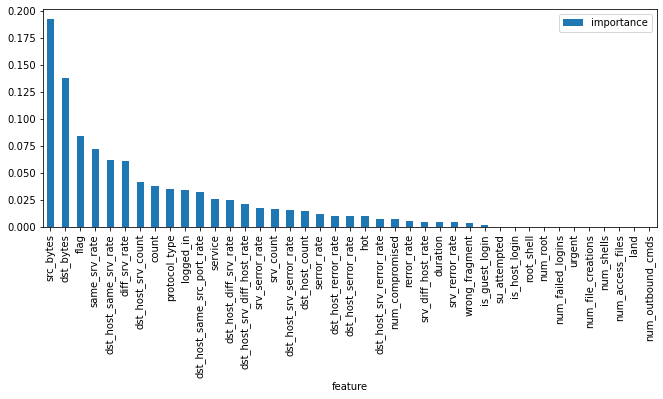

In [29]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# fit random forest classifier on the training set
rc.fit(train_x_final, train_y_final);
# extract important features
score = np.round(rc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x_final.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();


# Storing The Normalized Dataset in a new file

In [30]:
Train_Final=pd.concat([sc_traindf,train_cat_trans],axis=1)
Test_Final=pd.concat([sc_testdf,test_cat_trans],axis=1)


Train_Final=Train_Final.drop(['class'], axis=1)
Test_Final=Test_Final.drop(['class'], axis=1)

Train_Final=pd.concat([Train_Final,train_df['class']],axis=1)
Test_Final=pd.concat([Test_Final,test_df['class']],axis=1)

In [31]:
Train_Final.shape


(125973, 42)

In [32]:
Test_Final.shape


(22544, 42)

In [33]:
# store normalised dataset to new file
Train_Final.to_csv('KDDTrain_Norm.csv', index=False)

Test_Final.to_csv('KDDTest_Norm.csv', index=False)


In [34]:
Test_Final.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'protocol_type', 'service', 'flag',
       'class'],
      dtype='object')

In [35]:
importances


,importance
feature,
src_bytes,0.192
dst_bytes,0.138
flag,0.084
same_srv_rate,0.072
dst_host_same_srv_rate,0.062
diff_srv_rate,0.061
dst_host_srv_count,0.041
count,0.038
protocol_type,0.035


In [36]:
train_df['class'].head(5)

0     normal
1     normal
2    anomaly
3     normal
4     normal
Name: class, dtype: object